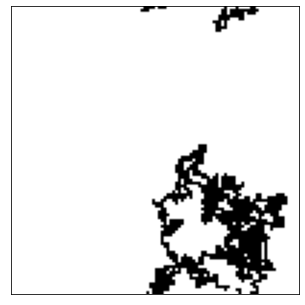

In [1]:
#Simulation of the bacterial population


import random
import numpy as np
import numba as nb
import pandas as pd
import matplotlib.pyplot as plt




#the length of each side of the lattice
side = 100

#number of bacteria
nbacteria = 1000

#bacterial density
#d = nbacteria / (side_lenght**2)

#degree of the patchiness
p = 1


#use numba to speed up simulations
nb.jit(nopython=True)
def Bacterial_sim(i0,j0):
    #Coordinate of the starting point
    i = i0
    j = j0
    
    #Repeat the loop until nbacteria is added to the lattice
    while len(np.where(lattice==1)[1])<nbacteria:
        #Choose a direction randomly (up, down, right or left)
        val = random.randint(1, 4)
        
        #for right:
        if val == 1 and i < side-p:
            i = i + p
            j = j
        #boundary condition for right side of the lattice:
        if val == 1 and i == side-p:
            i = 0
            j = j
        #for left:
        if val == 2 and i >= p:
            i = i - p
            j = j
        #boundary condition for left side of the lattice:
        if val == 2 and i < p:
            i = side-1
            j = j
        #for up:
        if val == 3 and j < side-p:
            i = i
            j = j + p
        #boundary condition for top of the lattice:
        if val == 3 and j == side-p:
            i = i
            j = 0
        #for down:
        if val == 4 and j >= p:
            i = i
            j = j - p
        #boundary condition for bottom of the lattice:
        if val == 4 and j < p:
            i = i
            j = side-1
            
        #place a bacteria at (i,j) coordinate
        lattice[i,j] = 1

        

#Make a lattice of size 
lattice = np.zeros((side,side))

#Find a random starting point for simulation of the bacterial population (i0,j0)
i0=round(random.uniform(0, side-1))
j0=round(random.uniform(0, side-1))

#Simulate the bacterial population
Bacterial_sim(i0=i0,j0=j0)



#show the results

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.imshow(lattice, alpha=1,cmap='binary');
ax.set_xticks([])
ax.set_yticks([]);

In [2]:
#Simulation of the fly's random walk in the lattice



#step size for the fly walk
p_fly = 1

#Time of the walk
T = 100000

#the length of each side of the lattice
side = 100

#randomly choose a starting point 
i = round(random.uniform(0, side-1))
j = round(random.uniform(0, side-1))

#Input to the system of DE
Input = np.zeros(T)

for z in range(T):
        val = random.randint(1, 4)
        if val == 1 and i <p_fly-1:
            i = i + 1
            j = j
        if val == 1 and i ==p_fly-1:
            i = 0
            j = j
        if val == 2 and i >0:
            i = i - 1
            j = j
        if val == 2 and i ==0:
            i = p_fly-1
            j = j
        if val == 3 and j <p_fly-1:
            i = i
            j = j + 1
        if val == 3 and j ==p_fly-1:
            i = i
            j = 0
        if val == 4 and j>0:
            i = i
            j = j - 1
        if val == 4 and j ==0:
            i = i
            j = p_fly-1
        #index the lattice
        Input[z] = lattice[i,j]
        


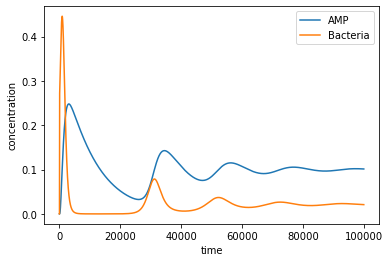

In [3]:
#Solving the system of DE using the stochastic input




#choosing values for bacterial proliferation rate (k0), rate of PG production (a), and PG degradation rate (l1) 

k0 = 0.1; a =2;l1 =0.01


#System of Differential equatioons explaining the activation of the fly immune response
#B  = bacterial concentration 
#G  = PG concentration
#R  = Free Receptor concentration
#X  = Receptor-PG complex concentration
#N  = Relish (NF-kB) concentration
#L  = PGRP-LB concentration
#P  = Pirk concentration
#S  = Repressosome concentration
#A  = AMP concentration
#v1 = Rate of receptor production
#v2 = Rate of receptor production
#v3 = Rate of receptor production
#v4 = Rate of receptor production
#v5 = Rate of receptor production
#v6 = Rate of receptor production

def dBdt(B,G,R,X,N,L,P,S,A,t): return Input[i] + k0*B -A*B
def dGdt(B,G,R,X,N,L,P,S,A,t): return k0*B*a - L*G - R*G + P*X +l3*X - l1*G
def dRdt(B,G,R,X,N,L,P,S,A,t): return R0 + v1*(N/(N+Zn))- P*R - R*G +l3*X - l2*R
def dXdt(B,G,R,X,N,L,P,S,A,t): return R*G - P*X - l3*X
def dNdt(B,G,R,X,N,L,P,S,A,t): return v2*X -l2*N
def dLdt(B,G,R,X,N,L,P,S,A,t): return v3*(N/(N+Zn)) -l2*L
def dPdt(B,G,R,X,N,L,P,S,A,t): return v4*(N/(N+Zn)) -l2*P
def dSdt(B,G,R,X,N,L,P,S,A,t): return v5*(N/(N+Zn)) -l2*S
def dAdt(B,G,R,X,N,L,P,S,A,t): return v6* (N/(N+Zn+(Zn*S/Zs))) - l2*A





#Custome written RK4 for solving DE
#h = step size for RK4 
h = 0.01
#t = time

def RungeKutta45(B,G,R,X,N,L,P,S,A,dBdt,dGdt,dRdt,dXdt,dNdt,dLdt,dPdt,dSdt,dAdt,t,h):
    k1B,k1G,k1R,k1X,k1N,k1L,k1P,k1S,k1A = ( h*f(B,G,R,X,N,L,P,S,A,t) for f in (dBdt,dGdt,dRdt,dXdt,dNdt,dLdt,dPdt,dSdt,dAdt) )
    Bs,Gs,Rs,Xs,Ns,Ls,Ps,Ss,As,ts = ( r+0.5*kr for r,kr in zip((B,G,R,X,N,L,P,S,A,t),(k1B,k1G,k1R,k1X,k1N,k1L,k1P,k1S,k1A,h)) )
    k2B,k2G,k2R,k2X,k2N,k2L,k2P,k2S,k2A  = ( h*f(Bs,Gs,Rs,Xs,Ns,Ls,Ps,Ss,As,ts) for f in (dBdt,dGdt,dRdt,dXdt,dNdt,dLdt,dPdt,dSdt,dAdt) )
    Bs,Gs,Rs,Xs,Ns,Ls,Ps,Ss,As,ts = ( r+0.5*kr for r,kr in zip((B,G,R,X,N,L,P,S,A,t),(k2B,k2G,k2R,k2X,k2N,k2L,k2P,k2S,k2A,h)) )
    k3B,k3G,k3R,k3X,k3N,k3L,k3P,k3S,k3A = ( h*f(Bs,Gs,Rs,Xs,Ns,Ls,Ps,Ss,As,ts) for f in (dBdt,dGdt,dRdt,dXdt,dNdt,dLdt,dPdt,dSdt,dAdt) )
    Bs,Gs,Rs,Xs,Ns,Ls,Ps,Ss,As,ts = ( r+kr for r,kr in zip((B,G,R,X,N,L,P,S,A,t),(k3B,k3G,k3R,k3X,k3N,k3L,k3P,k3S,k3A,h)) )
    k4B,k4G,k4R,k4X,k4N,k4L,k4P,k4S,k4A  =( h*f(Bs,Gs,Rs,Xs,Ns,Ls,Ps,Ss,As,ts) for f in (dBdt,dGdt,dRdt,dXdt,dNdt,dLdt,dPdt,dSdt,dAdt) )
    return (r+(k1r+2*k2r+2*k3r+k4r)/6 for r,k1r,k2r,k3r,k4r in
            zip((B,G,R,X,N,L,P,S,A),(k1B,k1G,k1R,k1X,k1N,k1L,k1P,k1S,k1A),(k2B,k2G,k2R,k2X,k2N,k2L,k2P,k2S,k2A),(k3B,k3G,k3R,k3X,k3N,k3L,k3P,k3S,k3A),(k4B,k4G,k4R,k4X,k4N,k4L,k4P,k4S,k4A)))



#Use optimized parameters
Optimized    = pd.read_csv('/Users/danial/Documents/Research/model/Faster model/odeint/Sinusoidal/f = 0.0001 k0 = 0.1 results/optimum.csv')

l2 = Optimized['l2'][10000]
l3 = Optimized['l3'][10000]
R0 = Optimized['R0'][10000]
v1 = Optimized['V1'][10000]
v2 = Optimized['V2'][10000]
v3 = Optimized['V3'][10000]
v4 = Optimized['V4'][10000]
v5 = Optimized['V5'][10000]
v6 = Optimized['V6'][10000]
Zn = Optimized['Zn'][10000]
Zs = Optimized['Zs'][10000]

#Vector of values

t = T * [0.0]
B = T * [0.0]
G = T * [0.0]
R = T * [0.0]
X = T * [0.0]
N = T * [0.0]
L = T * [0.0]
P = T * [0.0]
S = T * [0.0]
A = T * [0.0]

#Initial conditions
B[0],G[0],R[0],X[0],N[0],L[0],P[0],S[0],A[0] = 0,0,R0,0,0,0,0,0,0

#Solve the DE

for i in range(1, T):
       B[i],G[i],R[i],X[i],N[i],L[i],P[i],S[i],A[i]  = RungeKutta45(B[i-1],G[i-1],R[i-1],X[i-1],N[i-1],L[i-1],P[i-1],S[i-1],A[i-1], dBdt,dGdt,dRdt,dXdt,dNdt,dLdt,dPdt,dSdt,dAdt, t[i-1], h)
    

#Plot AMP expression and concentration of bacteria

plt.plot(A)
plt.plot(B)
plt.legend(['AMP','Bacteria'])
plt.xlabel('time')
plt.ylabel('concentration');